<a href="https://colab.research.google.com/github/nimito135/MachineLearningProjects/blob/main/SpaceShipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOOK AT THE BIG PICTURE

The goal of this machine learning project is to create a model that is able of classifying whether a passenger on the Titanic spaceship was transported to an alternate dimension or not, given the metrics that define each passenger.
The machine learning model will be used by rescue teams to know who to search for or which people to focus search and rescue efforts on.

This project is a supervised learning task, each instance has the desired label, it is also a classification task, each passenger has to be classified as $1$ if it was transported to an alternative dimension and $0$ if that passenger has to be searched.
Specifically it is a binary classification.

The metric of performance is the classification accuracy, the percentage of predicted labels that are correct.
$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Number of total predictions}} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
Where:
*   $\text{TP}=\text{True Positives}$
*   $\text{TN}=\text{True Negatives}$
*   $\text{FP}=\text{False Positives}$
*   $\text{FN}=\text{False Negatives}$

The model has to reach a performance of at least $75\%$, it is the minimum value to meet the objective.

#GET THE DATA

The need data comes from the dataset of Kaggle *Spaceship Titanic*, which has $3$ sets:

*   sample_submission.csv
*   test.csv
*   train.csv

Test and train sets have information of the passengers as name, planet of origin, planet of destiny, etc.





##Download the Data

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 71.7MB/s]


In [ ]:
!mkdir data

In [ ]:
!unzip spaceship-titanic.zip -d data

Archive:  spaceship-titanic.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


##Load the data

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
DATA_SETS_PATH = "/content/data"

def load_data(data_set_path, set_path):
    csv_path = os.path.join(data_set_path, set_path)
    return pd.read_csv(csv_path).copy()

In [ ]:
data_train = load_data(DATA_SETS_PATH, "train.csv")

Look the structure of the data:
The data has $14$ attributes, the attribute *Transported* is the objetive.
There are also some attributes which are irrelevants like *PassengerId* and *Name*, and others which can be separate in more attributes as *Cabin*.

In [ ]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Get a description of the data: There are $8693$ instances, the data set is really small, there are $6$ numerical attributes, $7$ attributes that contain *objects*, and the objetive attribute *Transported* is *Boolean*, its values will be converted to $1$ for *True* values and $0$ for *False*.
The data set has $12$ attributes which have *Null* values.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Get a summary of the numerical attributes.

In [ ]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Use an histogram to obtain an idea of the distribution of numerical attributes:

*   All attributes seem skewed to the right although at different levels. It could be a problem, due that the detection of pattern by machine learning algorithm could be more difficult.
*   It seems that the attributes *Room Service, Food Court, Shopping Center, Spa and Terrace* have outliers in the direction of the bias.


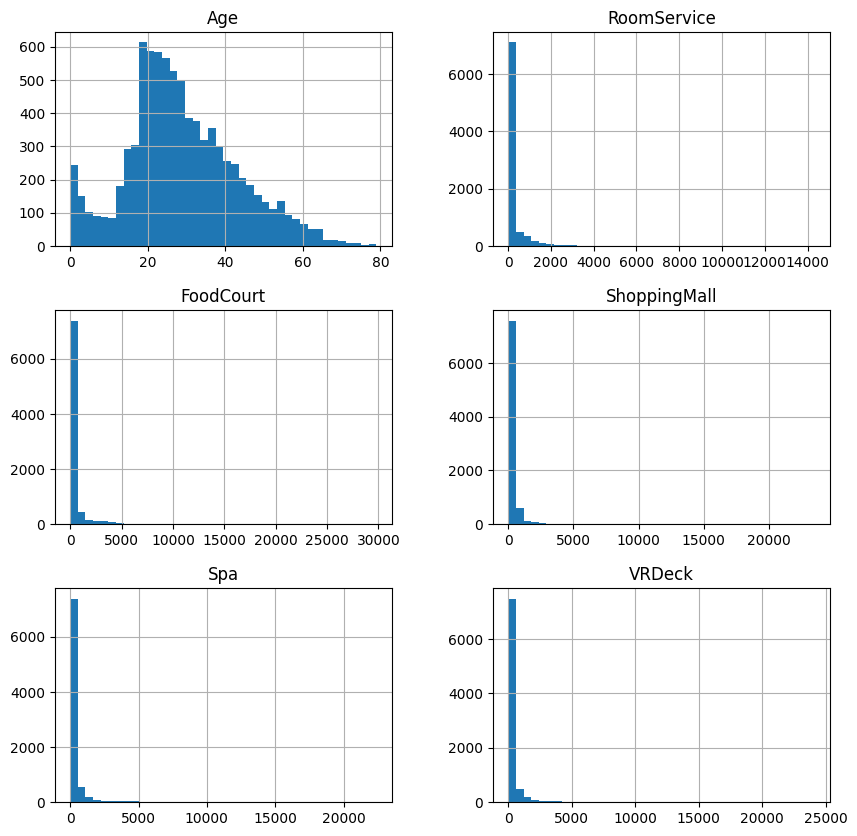

In [ ]:
import matplotlib.pyplot as plt

data_train.hist(bins=40, figsize=(10, 10))
plt.show()

There are $4378$ passengers who were transported to another dimension and are safe, the other $4315$ must be searched for.
The passengers who must be searched for represent approximately $50\%$.

In [ ]:
data_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [ ]:
data_train['Transported'].value_counts() / len(data_train)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

##Create a train set

The *training set* will be used to tune the parameters of multiple machine learning algorithms, and the *test set* will be used to evaluate how good the final system is.

In [ ]:
X_train = data_train.drop(['Transported'], axis=1)
y_train = data_train['Transported']

In [ ]:
X_test = load_data(DATA_SETS_PATH, "test.csv")

#EXPLORE THE DATA

The dataset has $13$ predictores and $1$ label or target attribute.

The numerical attributes are:

*   Age.
*   RoomService.
*   FoodCourt.
*   ShoppingMall.
*   Spa.
*   VRDeck.

The categorical attributes are:

*   PassengerId.
*   HomePlanet.
*   CryoSleep.
*   Cabin.
*   Destination.
*   VIP.
*   Name.
*   Transported(Target attribute).







In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), object(7)
memory usage: 883.0+ KB


Know the number and percentage of missing values in each predictor.
The missing values are few, les than $3\%$ in each case.

In [ ]:
for c in X_train.columns:
    null_values = len(X_train) - X_train[c].count()
    print('{} missing values:'.format(c))
    print('\tCount: {}\t\tPercent: {}%'.format(null_values,
                                 round((null_values)*100/len(X_train), 3)))

PassengerId missing values:
	Count: 0		Percent: 0.0%
HomePlanet missing values:
	Count: 201		Percent: 2.312%
CryoSleep missing values:
	Count: 217		Percent: 2.496%
Cabin missing values:
	Count: 199		Percent: 2.289%
Destination missing values:
	Count: 182		Percent: 2.094%
Age missing values:
	Count: 179		Percent: 2.059%
VIP missing values:
	Count: 203		Percent: 2.335%
RoomService missing values:
	Count: 181		Percent: 2.082%
FoodCourt missing values:
	Count: 183		Percent: 2.105%
ShoppingMall missing values:
	Count: 208		Percent: 2.393%
Spa missing values:
	Count: 183		Percent: 2.105%
VRDeck missing values:
	Count: 188		Percent: 2.163%
Name missing values:
	Count: 200		Percent: 2.301%


##Qualitative Data

*Chi-squared test* is used to determine if two categorical variables are dependent, there are two hypothesis:
*   Null hypothesis $H_{o}$: Variables are independent.
*   Alternative hypothesis $H_{a}$: Variables are dependent.

The probability of obtaining the observations in the training set is calculated under the assumption that $H_o$ is true. If the probability of obtaining such observations is less than the significance level $\alpha$, commonly set at $0.05$, then $H_{o}$ is rejected in favor of $H_{a}$. Otherwise, it is concluded that there is not enough evidence to reject $H_{o}$.

By obtaining the *Chi-squared* statistic:
$$
X^{2} = \sum_{i}{\frac{(Observed_{i}-Expected_{i})^{2}}{Expected_{i}}}
$$
It is possible to calculate the probability of obtaining the observations in the training set or more extreme ones, the *p*-value.
*Cramer's V* is also calculated, which gives a quantitative measure of the strength of association between the variables:
$$
\text{Cramer's V} = \sqrt{\frac{X^{2}}{n\cdot \text{min}(r-1, c-1)}}
$$
Where:

*   $n$: Number of observations.
*   $r$: No of rows.
*   $c$: No of columns.



In [ ]:
def contingency_tables(independ_var, depend_var):

    contingency_table = pd.crosstab(index=independ_var, columns=depend_var, margins=True, dropna=True)

    contingency_table.index = [str(i) for i in contingency_table.index]
    contingency_table.columns = [str(i) for i in contingency_table.columns]

    contingency_table_C = contingency_table.div(contingency_table.iloc[:, -1], axis=0)

    contingency_table_J = contingency_table.div(contingency_table.iloc[-1, -1])

    return (contingency_table, contingency_table_C, contingency_table_J)

In [ ]:
def chi_squared_test(contingency_table, join_contingency_table):

    from scipy.stats.distributions import chi2

    expected_table = join_contingency_table.copy()
    n_obs = contingency_table.iloc[-1, -1]
    for i in range(expected_table.shape[0] - 1):
        for j in range(expected_table.shape[1] - 1):
            expected_table.iloc[i, j] = expected_table.iloc[i, -1] * expected_table.iloc[-1, j] * n_obs

    chi_table = contingency_table.iloc[0:-1, 0:-1] - expected_table.iloc[0:-1, 0:-1]

    chi_table = chi_table ** 2

    chi_table = chi_table.div(expected_table.iloc[0:-1, 0:-1])

    chi_statistic = chi_table.to_numpy().sum()

    df = (chi_table.shape[0] - 1) * (chi_table.shape[1] - 1)

    p_value = chi2.sf(chi_statistic, df)

    return chi_statistic, p_value

In [ ]:
def v_cramer(chi_statistic, n_obs, n_rows, n_cols):
    return np.sqrt(chi_statistic / (n_obs * (min(n_rows - 1, n_cols - 1))))

In [ ]:
def descriptive_stat_vq(contingency_table,  cond_contingency_table, join_contingency_table):
    print("Contingency Table:")
    print(contingency_table, end='\n\n')
    print("Conditional Contingency Table:")
    print(cond_contingency_table, end='\n\n')
    print("Join Contingency Table:")
    print(join_contingency_table, end='\n\n')
    cond_contingency_table.iloc[0:-1, 0:-1].plot.bar()
    plt.legend(["No Transported", "Transported"])
    plt.show()
    print('\n')

In [ ]:
def result_chi_test(chi_stat, p_value, v_cramer):
    alpha = 0.05
    print("Chi-squared statistic: {}".format(chi_stat))
    print("p-value: {}".format(p_value))

    if p_value < alpha:
        print("It is very unlikely to obtain the observations of the training\n" +
              "set under the assumption that the null hypothesis is true,\n" +
              "therefore it is concluded that the variables are dependent.")
    else:
        print("""There is not enough evidence to reject the null hypothesis.""")

    print("V of Cramer: {}".format(v_cramer))

    if v_cramer < 0.20:
        print("""The relationship between the variables is WEAK.""")
    elif v_cramer < 0.30:
        print("""The relationship between the variables is MODERATE.""")
    elif v_cramer < 0.40:
        print("""The relationship between the variables is STRONG.""")
    elif v_cramer <= 1:
        print("""The relationship between the variables is VERY STRONG.""")

In [ ]:
qualitative_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

HomePlanet vs Transported
Contingency Table:
        False  True   All
Earth    2651  1951  4602
Europa    727  1404  2131
Mars      839   920  1759
All      4217  4275  8492

Conditional Contingency Table:
           False      True  All
Earth   0.576054  0.423946  1.0
Europa  0.341154  0.658846  1.0
Mars    0.476976  0.523024  1.0
All     0.496585  0.503415  1.0

Join Contingency Table:
           False      True       All
Earth   0.312176  0.229746  0.541922
Europa  0.085610  0.165332  0.250942
Mars    0.098799  0.108337  0.207136
All     0.496585  0.503415  1.000000



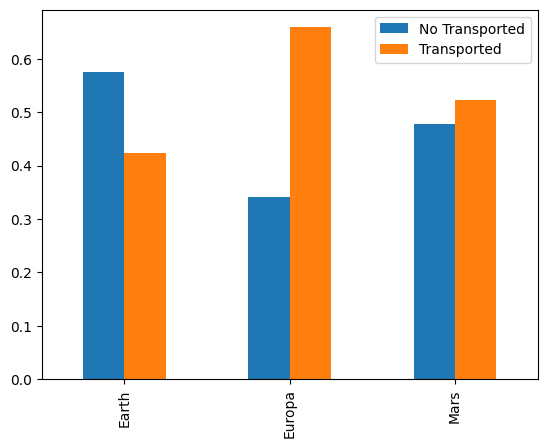



Chi-squared statistic: 324.9013834000384
p-value: 2.80905998525099e-71
It is very unlikely to obtain the observations of the training
set under the assumption that the null hypothesis is true,
therefore it is concluded that the variables are dependent.
V of Cramer: 0.19560087242990842
The relationship between the variables is WEAK.


CryoSleep vs Transported
Contingency Table:
       False  True   All
False   3650  1789  5439
True     554  2483  3037
All     4204  4272  8476

Conditional Contingency Table:
          False      True  All
False  0.671079  0.328921  1.0
True   0.182417  0.817583  1.0
All    0.495989  0.504011  1.0

Join Contingency Table:
          False      True       All
False  0.430628  0.211067  0.641694
True   0.065361  0.292945  0.358306
All    0.495989  0.504011  1.000000



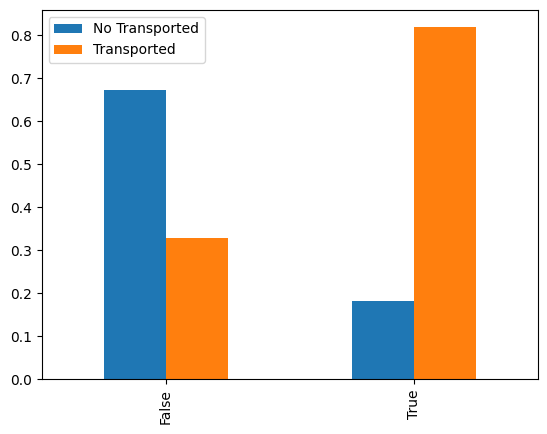



Chi-squared statistic: 1861.5669751763876
p-value: 0.0
It is very unlikely to obtain the observations of the training
set under the assumption that the null hypothesis is true,
therefore it is concluded that the variables are dependent.
V of Cramer: 0.4686448608124052
The relationship between the variables is VERY STRONG.


Destination vs Transported
Contingency Table:
               False  True   All
55 Cancri e      702  1098  1800
PSO J318.5-22    395   401   796
TRAPPIST-1e     3128  2787  5915
All             4225  4286  8511

Conditional Contingency Table:
                  False      True  All
55 Cancri e    0.390000  0.610000  1.0
PSO J318.5-22  0.496231  0.503769  1.0
TRAPPIST-1e    0.528825  0.471175  1.0
All            0.496416  0.503584  1.0

Join Contingency Table:
                  False      True       All
55 Cancri e    0.082481  0.129010  0.211491
PSO J318.5-22  0.046411  0.047115  0.093526
TRAPPIST-1e    0.367524  0.327459  0.694983
All            0.496416  0.503584

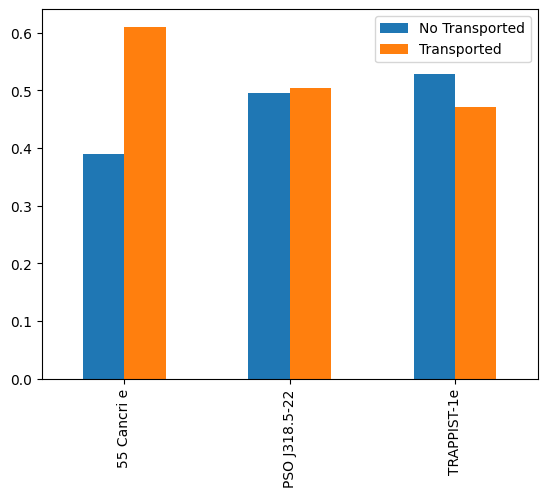



Chi-squared statistic: 106.39215684982226
p-value: 7.892901466137158e-24
It is very unlikely to obtain the observations of the training
set under the assumption that the null hypothesis is true,
therefore it is concluded that the variables are dependent.
V of Cramer: 0.11180584580691637
The relationship between the variables is WEAK.


VIP vs Transported
Contingency Table:
       False  True   All
False   4093  4198  8291
True     123    76   199
All     4216  4274  8490

Conditional Contingency Table:
          False      True  All
False  0.493668  0.506332  1.0
True   0.618090  0.381910  1.0
All    0.496584  0.503416  1.0

Join Contingency Table:
          False      True       All
False  0.482097  0.494464  0.976561
True   0.014488  0.008952  0.023439
All    0.496584  0.503416  1.000000



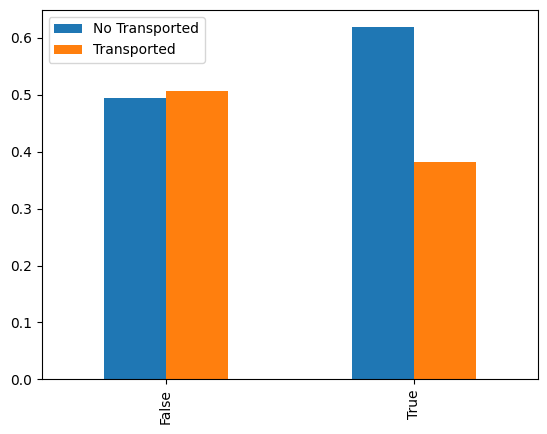



Chi-squared statistic: 12.034588466793496
p-value: 0.0005222236287871681
It is very unlikely to obtain the observations of the training
set under the assumption that the null hypothesis is true,
therefore it is concluded that the variables are dependent.
V of Cramer: 0.03764972225919811
The relationship between the variables is WEAK.




In [ ]:
for qv in qualitative_vars:
    print("{} vs Transported".format(qv))
    contingency_table, cond_contingency_table, join_contingency_table = contingency_tables(X_train[qv], y_train)
    descriptive_stat_vq(contingency_table, cond_contingency_table, join_contingency_table)

    chi_stat, p_value = chi_squared_test(contingency_table, join_contingency_table)
    v_c = v_cramer(chi_stat, contingency_table.iloc[-1, -1], contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
    result_chi_test(chi_stat, p_value, v_c)

    print('\n')

All qualitative attributes are related to the target attribute, but *CryoSleep* is the only one that is related to *Transported* very strongly.

The *Cabin* attribute, has information about *deck, number and side* of a passenger, we want to know if these attributes are related with the target attribute.

In [ ]:
cabin = X_train['Cabin'].str.split(pat='/', expand=True)

In [ ]:
cabin.columns = ['deck', 'num', 'side']

deck vs Transported
Contingency Table:
     False  True   All
A      129   127   256
B      207   572   779
C      239   508   747
D      271   207   478
E      563   313   876
F     1565  1229  2794
G     1238  1321  2559
T        4     1     5
All   4216  4278  8494

Conditional Contingency Table:
        False      True  All
A    0.503906  0.496094  1.0
B    0.265725  0.734275  1.0
C    0.319946  0.680054  1.0
D    0.566946  0.433054  1.0
E    0.642694  0.357306  1.0
F    0.560129  0.439871  1.0
G    0.483783  0.516217  1.0
T    0.800000  0.200000  1.0
All  0.496350  0.503650  1.0

Join Contingency Table:
        False      True       All
A    0.015187  0.014952  0.030139
B    0.024370  0.067342  0.091712
C    0.028138  0.059807  0.087944
D    0.031905  0.024370  0.056275
E    0.066282  0.036850  0.103132
F    0.184248  0.144690  0.328938
G    0.145750  0.155522  0.301271
T    0.000471  0.000118  0.000589
All  0.496350  0.503650  1.000000



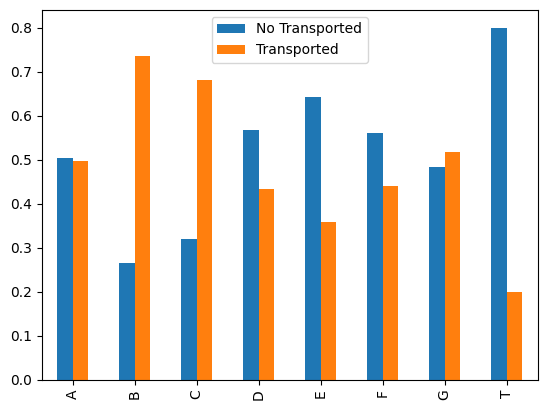



Chi-squared statistic: 392.28804119974797
p-value: 1.0743307258872032e-80
It is very unlikely to obtain the observations of the training
set under the assumption that the null hypothesis is true,
therefore it is concluded that the variables are dependent.
V of Cramer: 0.21490494369500296
The relationship between the variables is MODERATE.


side vs Transported
Contingency Table:
     False  True   All
P     2308  1898  4206
S     1908  2380  4288
All   4216  4278  8494

Conditional Contingency Table:
        False      True  All
P    0.548740  0.451260  1.0
S    0.444963  0.555037  1.0
All  0.496350  0.503650  1.0

Join Contingency Table:
        False      True       All
P    0.271721  0.223452  0.495173
S    0.224629  0.280198  0.504827
All  0.496350  0.503650  1.000000



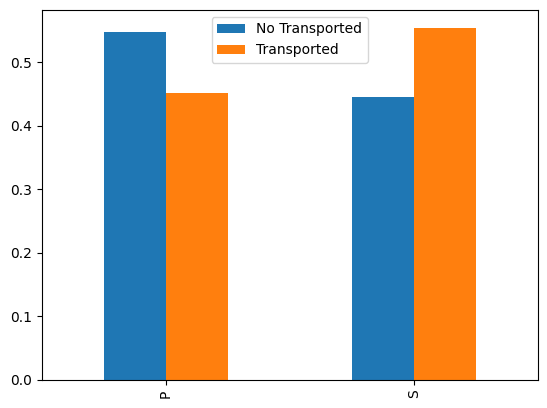



Chi-squared statistic: 91.47425704222698
p-value: 1.1305339625322883e-21
It is very unlikely to obtain the observations of the training
set under the assumption that the null hypothesis is true,
therefore it is concluded that the variables are dependent.
V of Cramer: 0.1037751374038435
The relationship between the variables is WEAK.




In [ ]:
for qv in cabin.columns:
    if qv != 'num':
        print("{} vs Transported".format(qv))
        contingency_table, cond_contingency_table, join_contingency_table = contingency_tables(cabin[qv], y_train)
        descriptive_stat_vq(contingency_table, cond_contingency_table, join_contingency_table)

        chi_stat, p_value = chi_squared_test(contingency_table, join_contingency_table)
        v_c = v_cramer(chi_stat, contingency_table.iloc[-1, -1], contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
        result_chi_test(chi_stat, p_value, v_c)

        print('\n')

We can combine the *deck* and *side* attributes to find out if it is more related to the target attribute than the original variables, and this is the case because the *Cramer's V* is higher.

In [ ]:
comb_var = cabin['deck'] + cabin['side']

0       BP
1       FS
2       AS
3       AS
4       FS
        ..
8688    AP
8689    GS
8690    GS
8691    ES
8692    ES
Length: 8693, dtype: object vs Transported
Contingency Table:
     False  True   All
AP      66    51   117
AS      63    76   139
BP     115   238   353
BS      92   334   426
CP     143   198   341
CS      96   310   406
DP     148   100   248
DS     123   107   230
EP     282   147   429
ES     281   166   447
FP     847   591  1438
FS     718   638  1356
GP     704   572  1276
GS     534   749  1283
TP       3     1     4
TS       1     0     1
All   4216  4278  8494

Conditional Contingency Table:
        False      True  All
AP   0.564103  0.435897  1.0
AS   0.453237  0.546763  1.0
BP   0.325779  0.674221  1.0
BS   0.215962  0.784038  1.0
CP   0.419355  0.580645  1.0
CS   0.236453  0.763547  1.0
DP   0.596774  0.403226  1.0
DS   0.534783  0.465217  1.0
EP   0.657343  0.342657  1.0
ES   0.628635  0.371365  1.0
FP   0.589013  0.410987  1.0
FS   0.529499  0.470501

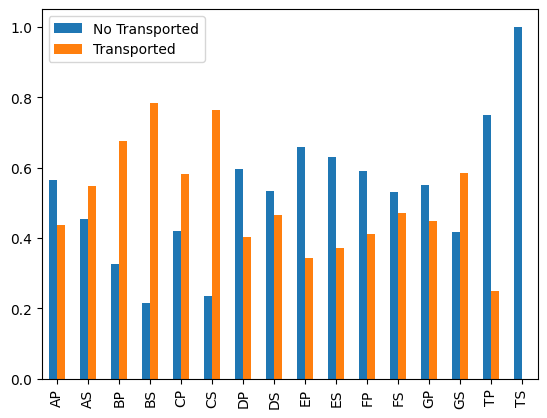



Chi-squared statistic: 489.1641417854934
p-value: 1.105686466876116e-94
It is very unlikely to obtain the observations of the training
set under the assumption that the null hypothesis is true,
therefore it is concluded that the variables are dependent.
V of Cramer: 0.23997786124086967
The relationship between the variables is MODERATE.




In [ ]:
print("{} vs Transported".format(comb_var))
contingency_table, cond_contingency_table, join_contingency_table = contingency_tables(comb_var, y_train)
descriptive_stat_vq(contingency_table, cond_contingency_table, join_contingency_table)

chi_stat, p_value = chi_squared_test(contingency_table, join_contingency_table)
v_c = v_cramer(chi_stat, contingency_table.iloc[-1, -1], contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
result_chi_test(chi_stat, p_value, v_c)

print('\n')

##Quantitative Data

To know if the target attribute is related to the quantitative variables, we establish two hypotheses about the difference in means of the quantitative variable for each group of the target attribute:

*   $H_{o}$: $\mu_{0}-\mu_{1}$.
*   $H_{a}$: $\mu_{0}-\mu_{1} \not = 0$.

$H_{o}$ establishes that there is no difference in means, so the variables are not related, while $H_{a}$ establishes that the variables are related.

The significance level is $\alpha = 0.05$, if it is found that the *p-value* is less than this, then $H_{o}$ is rejected and $H_{a}$ is accepted, if the *p-value* is greater or equal than $\alpha$ then it is concluded that there is not enough evidence to reject $H_{o}$.

In [ ]:
quantitative_vars = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

AGE vs TRANSPORTED
Pooled approach
	t statistic: -6.941461666045089  	 pvalue: 4.165050977554494e-12
Unpooled approach
	t statistic: -6.946540784264484  	 pvalue: 4.020796120599212e-12


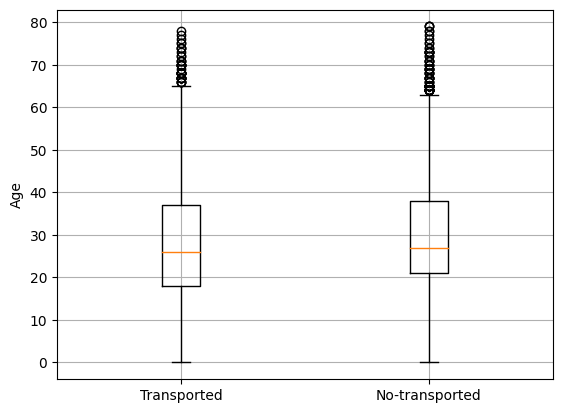



ROOMSERVICE vs TRANSPORTED
Pooled approach
	t statistic: -23.27230572812196  	 pvalue: 3.400493892669515e-116
Unpooled approach
	t statistic: -23.097925202540164  	 pvalue: 2.853151958537436e-112


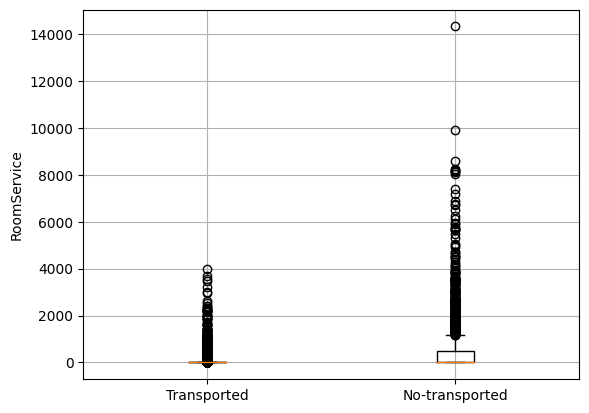



FOODCOURT vs TRANSPORTED
Pooled approach
	t statistic: 4.299893771259008  	 pvalue: 1.727865340729664e-05
Unpooled approach
	t statistic: 4.310649186731833  	 pvalue: 1.6495450809238318e-05


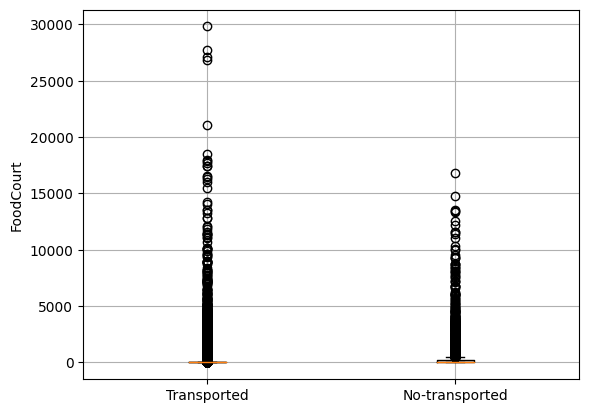



SHOPPINGMALL vs TRANSPORTED
Pooled approach
	t statistic: 0.934056481671101  	 pvalue: 0.3503013444989256
Unpooled approach
	t statistic: 0.936088637812045  	 pvalue: 0.3492588907666002


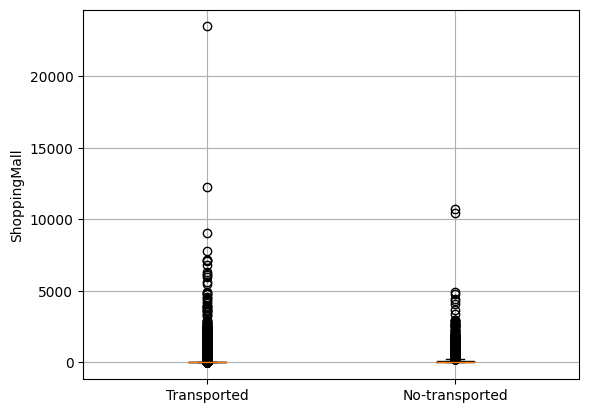



SPA vs TRANSPORTED
Pooled approach
	t statistic: -20.914657362229097  	 pvalue: 9.275825095363414e-95
Unpooled approach
	t statistic: -20.76664140661985  	 pvalue: 1.6332502570531143e-91


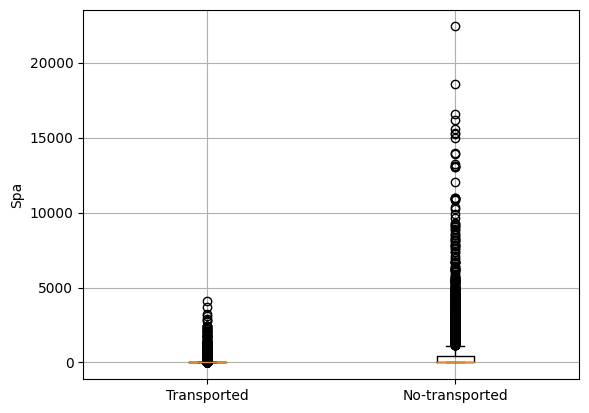



VRDECK vs TRANSPORTED
Pooled approach
	t statistic: -19.517825470012635  	 pvalue: 4.9897017399892476e-83
Unpooled approach
	t statistic: -19.400440093029363  	 pvalue: 1.3491209370056579e-80


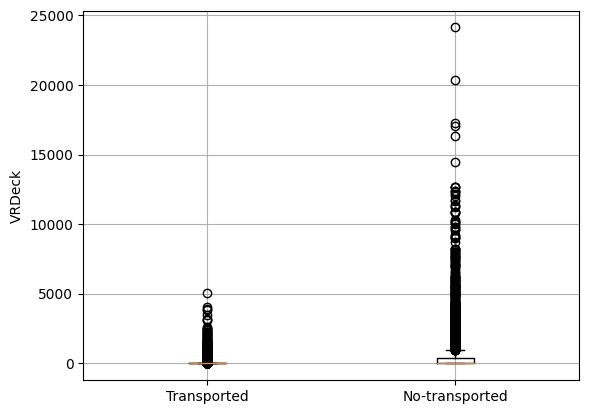

In [ ]:
import scipy.stats

for qv in quantitative_vars:
    smp_1 = X_train.loc[y_train == True, qv].dropna()
    smp_2 = X_train.loc[y_train == False, qv].dropna()
    pol_res = scipy.stats.ttest_ind(smp_1, smp_2, equal_var=True)
    upol_res = scipy.stats.ttest_ind(smp_1, smp_2, equal_var=False)
    print("{} vs {}".format(qv.upper(), "TRANSPORTED"))
    print("Pooled approach")
    print("\tt statistic: {}  \t pvalue: {}".format(pol_res[0], pol_res[1]))
    print("Unpooled approach")
    print("\tt statistic: {}  \t pvalue: {}".format(upol_res[0], upol_res[1]))
    plt.boxplot([smp_1, smp_2])
    plt.grid()
    plt.ylabel(qv)
    plt.xticks(ticks= [1, 2], labels=['Transported', 'No-transported'])
    plt.show()
    print('\n')

It is possible to see that the *p-values* are less than $\alpha=0.05$ for all attributes whether the pooled or un-pooled approach is used, except ShoppingMall, so $H_{o}$ is rejected and $H_{a}$ is accepted.
Furthermore, the box plots show that all attributes have outlier values.

#PREPARE THE DATA FOR MACHINE LEARNING ALGORITHMS

#Clean the data

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def getColNames(X, typeCols):
    """Gets column names of a certain type.

    Args:
      X: Dataframe with column names.
      typeCols: Type of columns(numerical, categorical).

    Returns:
      cat_cols: A list with the name of the columns of a certain type.
    """
    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = list(set(X.columns) - set(num_cols))

    if typeCols == 'num':
        return num_cols

    elif typeCols == 'cat':
        return cat_cols

We will expand the attribute *Cabin*, which contains data of *deck*, *num* and *side*.

In [ ]:
def ExpandColumn(X, column, separator, colNames):
    """Expands a column consisting of multiple elements joined by a symbol.

    Args:
      X: Dataframe.
      column: Column whose elements are divided into multiple columns.
      separator: Symbol that we will use to separate the data.
      colNames: Names of the resultant columns which contain the separate data.

    Returns:
      X_exp: Expanded object with new columns.
    """
    exp_col = X[column].str.split(pat=separator, expand=True)
    X_exp = pd.concat([X, exp_col], axis=1)

    for i in range(len(colNames)):
        X_exp.rename(columns={i: colNames[i]}, inplace=True)

    return X_exp

In [ ]:
expandCol = FunctionTransformer(ExpandColumn, kw_args=dict(column='Cabin', separator='/', colNames=['deck', 'num', 'side']))

In [ ]:
X_train = expandCol.fit_transform(X_train)

In [ ]:
X_train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0,S


We will remove redundant or innecesary attributes like *Cabin*, *PassengerId*, *num* and *name*.

In [ ]:
def DeleteColumns(X, columns):
    """Delete a list of columns from the Dataframe.

    Args:
      X: Dataframe.
      columns: Columns to be removed.

    Returns:
      X: Dataframe without columns removed.
    """
    X = X.drop(columns, axis=1)

    return X

In [ ]:
deleteCols = FunctionTransformer(DeleteColumns, kw_args=dict(columns=['PassengerId', 'Cabin', 'num', 'Name']))

In [ ]:
X_train = deleteCols.fit_transform(X_train)

In [ ]:
X_train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S


It is time to handle missing values.
Due to the existence of outliers, numerical attributes will be filled out with the median, while categorical attributes will be filled out with the most frequent value.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
num_imputer = SimpleImputer(strategy='median')

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
X_train[getColNames(X_train, 'num')] = num_imputer.fit_transform(X_train[getColNames(X_train, 'num')])

In [ ]:
X_train[getColNames(X_train, 'cat')] = cat_imputer.fit_transform(X_train[getColNames(X_train, 'cat')])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  deck          8693 non-null   object 
 11  side          8693 non-null   object 
dtypes: float64(6), object(6)
memory usage: 815.1+ KB


The combination of the attributes *deck* and *side* is statistically significant.

In [ ]:
def combineAttribs(X, columns):
    """Delete a list of columns from the Dataframe.

    Args:
      X: Dataframe.
      columns: Attributes to be merged.

    Returns:
      merged: Merged Attribute.
    """
    merged = X[columns[0]].astype(str) + X[columns[1]].astype(str)
    return merged

In [ ]:
combineCols = FunctionTransformer(combineAttribs, kw_args=dict(columns=['deck', 'side']))

In [ ]:
X_train['ds'] = combineCols.fit_transform(X_train)

In [ ]:
X_train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side,ds
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P,BP
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S,FS
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S,AS


The data is strongly skewed to the right, we use the square root, to make it a little less skewed.

In [ ]:
squareRootCols = FunctionTransformer(np.sqrt)

In [ ]:
X_train[getColNames(X_train, 'num')] = squareRootCols.fit_transform(X_train[getColNames(X_train, 'num')])

We scale the numerical attributes so that they do not have such extreme values.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
X_train[getColNames(X_train, 'num')] = std.fit_transform(X_train[getColNames(X_train, 'num')])

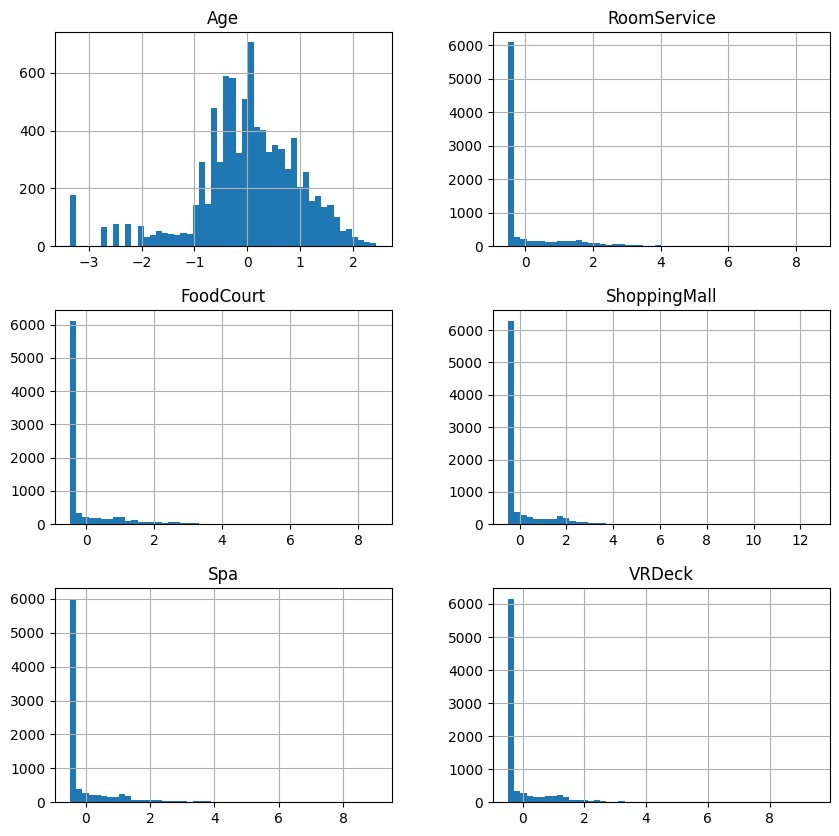

In [ ]:
X_train.hist(bins=50, figsize=(10, 10))
plt.show()

The data is still skewed to the right but to a lesser extent, this is because in certain attributes the majority of the data has a value of $0$, so the square root keeps them with the same value.

In [ ]:
X_train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side,ds
0,Europa,False,TRAPPIST-1e,0.718869,False,-0.508537,-0.471952,-0.487678,-0.478100,-0.464515,B,P,BP
1,Earth,False,TRAPPIST-1e,-0.157843,False,0.281119,-0.315299,-0.060486,1.009995,-0.041015,F,S,FS
2,Europa,False,TRAPPIST-1e,1.611706,True,-0.012563,2.650648,-0.487678,4.726264,-0.017599,A,S,AS


Due machine learning algorithms work best with numbers, categorical attributes will be encoded, if the attribute only has two values an ordinal encoding will be used, while if the attribute contains more than two possible values then it will use a one hot encoding.

In [ ]:
ord_vars = []
ohe_vars = []
for col in getColNames(X_train, 'cat'):
    if X_train[col].value_counts().shape[0] > 2:
        ohe_vars.append(col)
    else:
        ord_vars.append(col)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
ord_encod = OrdinalEncoder()

In [ ]:
X_train[ord_vars] = ord_encod.fit_transform(X_train[ord_vars])

In [ ]:
X_train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side,ds
0,Europa,0.0,TRAPPIST-1e,0.718869,0.0,-0.508537,-0.471952,-0.487678,-0.478100,-0.464515,B,0.0,BP
1,Earth,0.0,TRAPPIST-1e,-0.157843,0.0,0.281119,-0.315299,-0.060486,1.009995,-0.041015,F,1.0,FS
2,Europa,0.0,TRAPPIST-1e,1.611706,1.0,-0.012563,2.650648,-0.487678,4.726264,-0.017599,A,1.0,AS


In [ ]:
ohe_encod = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [ ]:
X_ohe = ohe_encod.fit_transform(X_train[ohe_vars])

In [ ]:
X_ohe.head(3)

,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,ds_AP,ds_AS,...,ds_GP,ds_GS,ds_TP,ds_TS,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train = pd.concat([X_train, X_ohe], axis=1).drop(columns = ohe_vars)

In [ ]:
X_train.head(3)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,side,deck_A,...,ds_GP,ds_GS,ds_TP,ds_TS,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0.0,0.718869,0.0,-0.508537,-0.471952,-0.487678,-0.478100,-0.464515,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,-0.157843,0.0,0.281119,-0.315299,-0.060486,1.009995,-0.041015,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.611706,1.0,-0.012563,2.650648,-0.487678,4.726264,-0.017599,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train = X_train.to_numpy()

Finally we encode the labels.

In [ ]:
y_train = y_train.replace({True: 1, False: 0})

In [ ]:
y_train.head(3)

0    0
1    1
2    0
Name: Transported, dtype: int64

In [ ]:
y_train = y_train.to_numpy()

#SELECT ML ALGORITHMS

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def display_scores(scores):
    print("Scores: {}".format(scores))
    print("Mean: {}".format(scores.mean()))
    print("Standard deviation: {}".format(scores.std()))

*SGD Classifier*

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
scores_sgd_clf = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")

In [ ]:
display_scores(scores_sgd_clf)

Scores: [0.8045977  0.76436782 0.76091954 0.78826237 0.78020713 0.80667434
 0.80782509 0.80782509 0.81012658 0.78481013]
Mean: 0.7915615782442496
Standard deviation: 0.017708258625714658


*RandomForest Classifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
scores_forest_clf = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="accuracy")

In [ ]:
display_scores(scores_forest_clf)

Scores: [0.80229885 0.75977011 0.78275862 0.8009206  0.81357883 0.79516686
 0.80322209 0.78135788 0.80782509 0.77675489]
Mean: 0.7923653823260982
Standard deviation: 0.015830945808398455


*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_clf = LogisticRegression(random_state=42, max_iter=200)

In [ ]:
scores_lr_clf = cross_val_score(lr_clf, X_train, y_train, cv=10, scoring="accuracy")

In [ ]:
display_scores(scores_lr_clf)

Scores: [0.7862069  0.7816092  0.77586207 0.80322209 0.78365938 0.80322209
 0.81703107 0.79746835 0.81818182 0.78135788]
Mean: 0.7947820853669828
Standard deviation: 0.0144955100148841


*Support Vector Machine*

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC(random_state=42)

In [ ]:
scores_svm_clf = cross_val_score(svm_clf, X_train, y_train, cv=10, scoring="accuracy")

In [ ]:
display_scores(scores_svm_clf)

Scores: [0.80574713 0.77816092 0.78965517 0.81242808 0.79976985 0.80437284
 0.82508631 0.81357883 0.82163406 0.81012658]
Mean: 0.8060559766146845
Standard deviation: 0.01344678870536806


*Neural Network*

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(39,)),
    keras.layers.Dense(39, activation=keras.activations.relu),
    keras.layers.Dense(60, activation=keras.activations.relu),
    keras.layers.Dense(60, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
231/231 [==============================] - 2s 3ms/step - loss: 0.6626 - accuracy: 0.6418 - val_loss: 0.6300 - val_accuracy: 0.7393
Epoch 2/50
231/231 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.7634 - val_loss: 0.5285 - val_accuracy: 0.7768
Epoch 3/50
231/231 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.7825 - val_loss: 0.4512 - val_accuracy: 0.7952
Epoch 4/50
231/231 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7959 - val_loss: 0.4226 - val_accuracy: 0.8067
Epoch 5/50
231/231 [==============================] - 1s 2ms/step - loss: 0.4314 - accuracy: 0.8005 - val_loss: 0.4137 - val_accuracy: 0.7960
Epoch 6/50
231/231 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8002 - val_loss: 0.4084 - val_accuracy: 0.7960
Epoch 7/50
231/231 [==============================] - 1s 2ms/step - loss: 0.4215 - accuracy: 0.8001 - val_loss: 0.4132 - val_accuracy: 0.7998
Epoch 

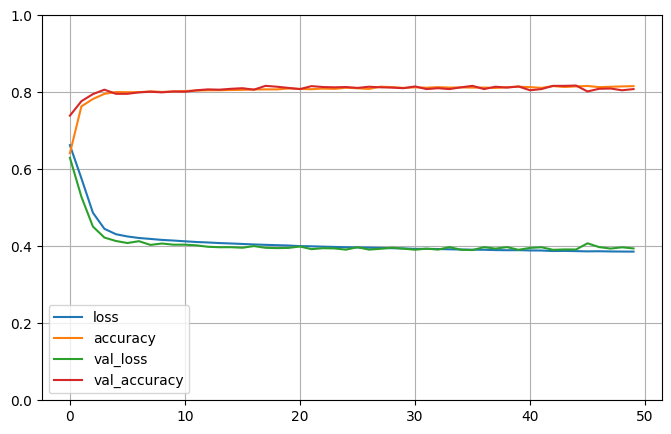

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The most promising models would be the *support vector machine* and the *neural network*, both models exceed the $80\%$ of accuracy in the validation set, in this case *Support vector machine* will be used, because the *SVM* work well with the task of data classification on medium or small datasets, and in normalized data.

#REFINE THE MODEL

We will look for the best hyperparameters with *GridSearchCV*.

We first transform the test set, using the same transformations that were used for the training set, but this time only using the *transform* method instead *fit_transform*.

In [ ]:
X_test_n = X_test.copy()

In [ ]:
X_test_n = expandCol.transform(X_test_n)

In [ ]:
X_test_n = deleteCols.transform(X_test_n)

In [ ]:
X_test_n[getColNames(X_test_n, 'num')] = num_imputer.transform(X_test_n[getColNames(X_test_n, 'num')])
X_test_n[getColNames(X_test_n, 'cat')] = cat_imputer.transform(X_test_n[getColNames(X_test_n, 'cat')])

In [ ]:
X_test_n['ds'] = combineCols.transform(X_test_n)

In [ ]:
X_test_n[getColNames(X_test_n, 'num')] = squareRootCols.transform(X_test_n[getColNames(X_test_n, 'num')])

In [ ]:
X_test_n[getColNames(X_test_n, 'num')] = std.transform(X_test_n[getColNames(X_test_n, 'num')])

In [ ]:
X_test_n[ord_vars] = ord_encod.transform(X_test_n[ord_vars])

In [ ]:
X_ohe_t = ohe_encod.transform(X_test_n[ohe_vars])

In [ ]:
X_test_n = pd.concat([X_test_n, X_ohe_t], axis=1).drop(columns = ohe_vars)

In [ ]:
X_test_n.head(3)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,side,deck_A,...,ds_GP,ds_GS,ds_TP,ds_TS,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1.0,0.035717,0.0,-0.508537,-0.471952,-0.487678,-0.478100,-0.464515,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,-0.509618,0.0,-0.508537,-0.315299,-0.487678,2.896327,-0.464515,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.277761,0.0,-0.508537,-0.471952,-0.487678,-0.478100,-0.464515,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Finally, we transform the *DataFrame* into a *numpy array*.

In [ ]:
X_test_n = X_test_n.to_numpy()

In [ ]:
from sklearn.model_selection import GridSearchCV

We establish the hyperparameters of the *Vector Support Machine* for classification:
*   C: Is the hyperparameter of regularization.
*   coef0: Controls how much the model is influenced by high-degree terms versus low-degree terms.

In [ ]:
param_grid = [
    {'C': [0.1, 1, 10, 100], 'coef0': [0.1, 1, 10]}
]

In [ ]:
svm_clf = SVC(kernel='poly', degree=2)

In [ ]:
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring='accuracy',
                           return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(degree=2, kernel='poly'),
             param_grid=[{'C': [0.1, 1, 10, 100], 'coef0': [0.1, 1, 10]}],
             return_train_score=True, scoring='accuracy')

We obtain the best values of the hyperparameters, we print the accuracy values of the different combinations and get the best score.

In [ ]:
grid_search.best_params_

{'C': 1, 'coef0': 1}

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print('{}, {}'.format(mean_score, params))

0.7997249560260772, {'C': 0.1, 'coef0': 0.1}
0.8001852022578112, {'C': 0.1, 'coef0': 1}
0.8014504426534863, {'C': 0.1, 'coef0': 10}
0.801565543915201, {'C': 1, 'coef0': 0.1}
0.8027160006794111, {'C': 1, 'coef0': 1}
0.8020255916280289, {'C': 1, 'coef0': 10}
0.7958142526886806, {'C': 10, 'coef0': 0.1}
0.7970794533805745, {'C': 10, 'coef0': 1}
0.7970794136767934, {'C': 10, 'coef0': 10}
0.795009020302052, {'C': 100, 'coef0': 0.1}
0.795009020302052, {'C': 100, 'coef0': 1}
0.7948939190403373, {'C': 100, 'coef0': 10}


In [ ]:
grid_search.best_score_

0.8027160006794111

We use the best estimator to predict the categories of the test set and form it into a *DataFrame* to send to *Kaggle*.

In [ ]:
best_svm_clf = grid_search.best_estimator_

In [ ]:
y_hat_test = best_svm_clf.predict(X_test_n)

In [ ]:
y_hat_test = y_hat_test.astype(bool)

In [ ]:
submission = pd.DataFrame([X_test['PassengerId'], y_hat_test]).T

In [ ]:
submission.columns = ['PassengerId', 'Transported']

In [ ]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


#SUBMIT TO KAGGLE

In [ ]:
submission.to_csv('kaggle_submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c spaceship-titanic -f "kaggle_submission.csv" -m "SVM"

An accuracy of $0.80406$ in the test set is obtained, which places us in $437$st place out of $2751$ participants.

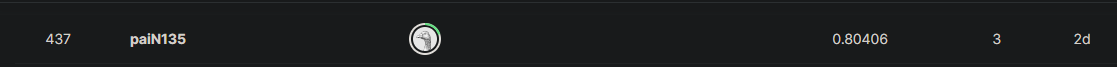